In [1]:
#import ROOT
#import numpy as np
import matplotlib.pyplot as plt
from melp import Detector
#import melp

Welcome to JupyROOT 6.24/06


In [2]:
#test = melp.TileHitAngle("sorted_truth.root", "outtest_1")
#test = melp.TileHitAngle("mu3e_run_050000.root", "outtest_big")

In [3]:
#mu3e_detector = dt.Detector(test.tile_id_pos, test.tile_id_pos, [0,1,2])

In [4]:
mu3e_detector = Detector.initFromROOT("sorted_truth.root")
#mu3e_detector = dt.Detector.initFromSave("test_detector_file")

------------------------------
Created Detector geometry

Stats:
  - Tiles:  5824
  - Pixel Modules:  2844
------------------------------


In [5]:
#mu3e_detector.save("test_detector_file")

In [6]:
#for i in mu3e_detector.Tiles.tile:
#    print(mu3e_detector.Tiles.tile[i].pos)

In [7]:
mu3e_detector.addTileHits("sorted_truth.root")

In [8]:
#print(mu3e_detector.Hits[0].pos)

In [9]:
num = 0
for i in mu3e_detector.Tiles.tile:
    if len(mu3e_detector.Tiles.tile[i].hits) > 0:
        #print(mu3e_detector.Tiles.tile[i].hits[0].mc_i)
        num += 1
print(num)

5810


In [10]:
#mu3e_detector.Tiles.rateId()

In [11]:
#mu3e_detector.Tiles.tile

In [12]:
#mu3e_detector.Sensors.getPixelPos(256704512)

In [13]:
#mu3e_detector.Sensors.sensor

In [14]:
z_arr   = []
hit_arr = []

dict_rate = mu3e_detector.Tiles.rateId()

for i in dict_rate:
    z_arr.append(mu3e_detector.Tiles.getPos(i)[2])
    hit_arr.append(dict_rate[i])

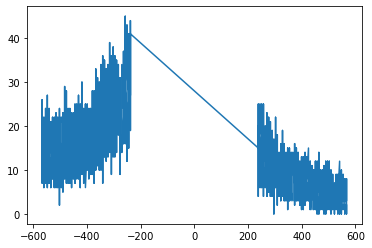

In [15]:
plt.plot(z_arr,hit_arr)
plt.show()

In [16]:
z_arr, hit_arr = mu3e_detector.Tiles.rateZ()

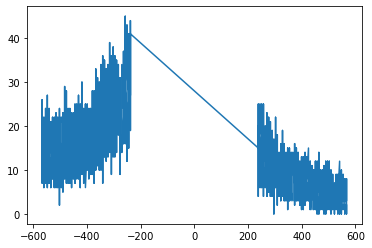

In [17]:
plt.plot(z_arr,hit_arr)
plt.show()

In [18]:
mu3e_detector.Tiles.tile[200999].pos

[23.096768680569443, -56.094901765031594, -457.345]

In [19]:
mu3e_detector.Tiles.calcTruthImpactVec("sorted_truth.root")

In [20]:
#mu3e_detector.Tiles.tile[200999].impact_vec


In [21]:
#mu3e_detector.Tiles.calcAngleTruth_byId()

In [22]:
mu3e_detector.Tiles.calcAngleTruth_byZ()

(array([-566.915, -566.915, -566.915, ...,  566.915,  566.915,  566.915]),
 array([ 46.10721114, 125.41422262,  45.7272301 , ..., 146.5671315 ,
         77.40262575, 144.6426273 ]))

In [23]:
binned, xedges, yedges = mu3e_detector.Tiles.getBinned()

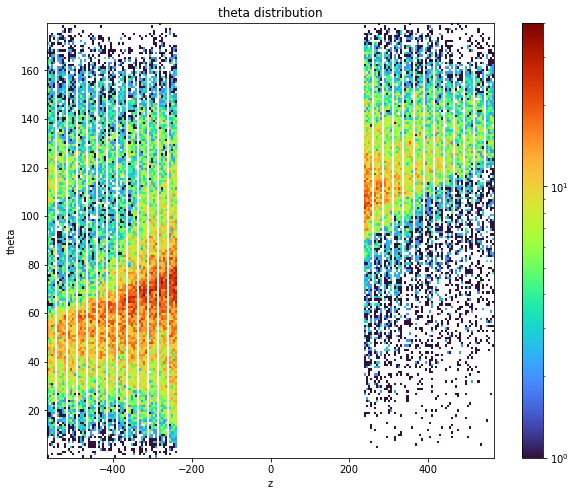

In [24]:
import numpy as np

fig = plt.figure(figsize=(10, 8))
import matplotlib as mpl
ax = fig.add_subplot(111, title='theta distribution')
X, Y = np.meshgrid(xedges, yedges)
im = ax.pcolormesh(X, Y, binned.T, cmap="turbo", norm = mpl.colors.LogNorm())
plt.ylabel("theta")
plt.xlabel("z")
plt.colorbar(im)
plt.show()